https://www.kaggle.com/datasets/whenamancodes/ideal-customer-analysis-personality-test

# People:
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

# Products:
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

# Promotion:
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

# Place:
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

In [2]:
import pandas as pd

# pandas separator tab

df= pd.read_csv("marketing_campaign.csv", sep="\t")

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# data cleaning

* umbenennen der Spalten
* Zahlen, die als String gespeichert sind, konvertieren und ggf. String-Teile entfernen
* fehlerhafte Einträge entfernen (z.B. wenn überall oder fast überall null steht)
* ggf. neue Spalten aus vorhandenen Daten erstellen
* Datentypen überprüfen und ggf. ändern
* Spalten entfernen, die für die Auswertung keine Rolle spielen
* Fehlende Werte auffüllen (z.B. mit dem Mean)

In [3]:
# rename cols to lowercase
df.columns=df.columns.str.lower()
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

# add

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
id                     2240 non-null int64
year_birth             2240 non-null int64
education              2240 non-null object
marital_status         2240 non-null object
income                 2216 non-null float64
kidhome                2240 non-null int64
teenhome               2240 non-null int64
dt_customer            2240 non-null object
recency                2240 non-null int64
mntwines               2240 non-null int64
mntfruits              2240 non-null int64
mntmeatproducts        2240 non-null int64
mntfishproducts        2240 non-null int64
mntsweetproducts       2240 non-null int64
mntgoldprods           2240 non-null int64
numdealspurchases      2240 non-null int64
numwebpurchases        2240 non-null int64
numcatalogpurchases    2240 non-null int64
numstorepurchases      2240 non-null int64
numwebvisitsmonth      2240 non-null int64
acceptedcmp3           2240 

## bei income fehlen 24 Einträge, was tun?

Variante 1: Rows entfernen, da income eine wichtige Information ist, die fehlt
Variante 2: Fehlende Incomes durch das Mean-Income ersetzen. So bleiben die übrigen Informationen im Datensatz erhalten

In [5]:
# remove rows with missing income
df.dropna(subset=["income"], inplace=True)

In [6]:
# show all columns with object datatype
df.select_dtypes(include="object").columns

Index(['education', 'marital_status', 'dt_customer'], dtype='object')

Datentypen passen überall

In [7]:
# add neu Column children_count with the sum of kidhome and teenhome
df["children_count"]=df["kidhome"]+df["teenhome"]

ID ist keine relevate Information für die Auswertung, kann entfernt werden

In [8]:
# drop id column
df.drop("id", axis=1, inplace=True)

## Datacleaning abgeschlossen

# explorative Datenvisualisierung

In [9]:
import matplotlib.pyplot as plt

In [10]:
df.head()

,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,...,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,children_count
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,0,3,11,1,0
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,0,3,11,0,2
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,3,11,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,0,3,11,0,1
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,0,3,11,0,1


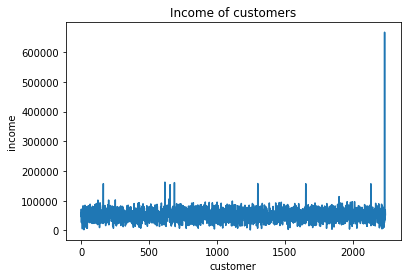

In [11]:
plt.plot(df["income"])
plt.xlabel("customer")
plt.ylabel("income")
plt.title("Income of customers")
plt.show()

Der Chart macht so aber wenig Sinn (wir brauchten halt einen Line-Chart)

In [12]:
df["dt_customer"].dtype

dtype('O')

In [13]:
# convert dt_customer to datetime
df["dt_customer"]=pd.to_datetime(df["dt_customer"])

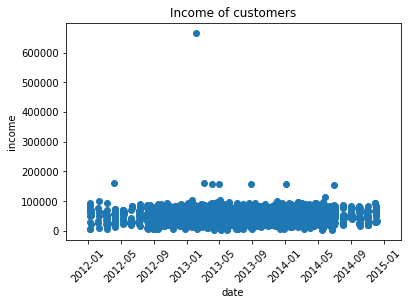

In [14]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# scatter plot with dt_customer and income
plt.scatter(df["dt_customer"], df["income"])
plt.xlabel("date")
# rotate xticks
plt.xticks(rotation=45)
plt.ylabel("income")
plt.title("Income of customers")
plt.show()


Aussage dieser Grafik:

* Es gibt KEINEN Zusammenhang zwischen dem Datum der Anmeldung und dem Einkommen
* Offensichtlich gibt es einen Outlier, der ein sehr hohes Einkommen hat (den müssen wir noch bereinigen). Ist aber eigentlich nicht der Job dieser Grafik sowas zu finden

In [15]:
# remove outlier
df=df[df["income"]<300000]

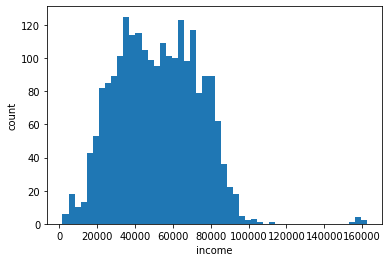

In [16]:
# histogram of income
plt.hist(df["income"], bins=50)
plt.xlabel("income")
plt.ylabel("count")
plt.show()


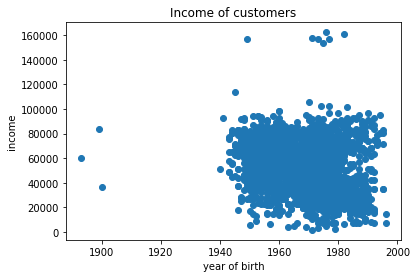

In [17]:
# scatter plot with year_birth and income
plt.scatter(df["year_birth"], df["income"])
plt.xlabel("year of birth")
plt.ylabel("income")
plt.title("Income of customers")
plt.show()

In [18]:
# remove rows with year_birth < 1910
df=df[df["year_birth"]>=1910]

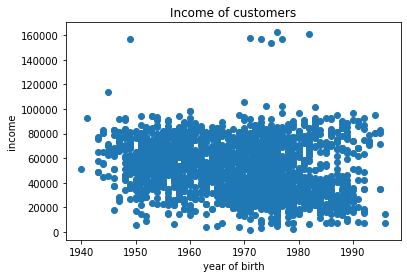

In [19]:
# scatter plot with year_birth and income
plt.scatter(df["year_birth"], df["income"])
plt.xlabel("year of birth")
plt.ylabel("income")
plt.title("Income of customers")
plt.show()

In [20]:
# print pearson correlation coefficient between year_birth and income
df["year_birth"].corr(df["income"])

-0.1999766464388071